Se entrega data de pruebas donde la variable objetivo es precio de venta de una propiedad (SalePrice).

- [x] Leer los datos completos y guardarlos en un dataset (data)
- [x] Leer los datos sin la variable objetivo y guardarlos en un dataset (data_sin_y)
- [] Realizar la correlacion de los dos dataset
- [x] Mostrar la matriz de correlacion de los dos dataset
- [x] Identificar al menos 1 correlacion mayor al 90% en el dataset completo
- [x] Llenar en el dataset que no tiene la variable objetivo en los datos null lo siguiente
    - [x] Campos numerico la mediana (median)
    - [x] Campos categoricos la mas frecuente (most_frequent)

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder 
from sklearn.impute import SimpleImputer #scikit-learn

In [119]:
# 1. Leer los datos completos y guardarlos en un dataset (data)
data = pd.read_csv("../data/no_processed/train_cat.csv")
# pd.set_option('display.max_columns', None)
# data.head()
data.drop('Id', axis=1, inplace=True)
data.info()
# data.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2302 non-null   int64  
 1   MSZoning       2298 non-null   object 
 2   LotFrontage    1915 non-null   float64
 3   LotArea        2302 non-null   int64  
 4   Street         2302 non-null   object 
 5   Alley          148 non-null    object 
 6   LotShape       2302 non-null   object 
 7   LandContour    2302 non-null   object 
 8   Utilities      2301 non-null   object 
 9   LotConfig      2302 non-null   object 
 10  LandSlope      2302 non-null   object 
 11  Neighborhood   2302 non-null   object 
 12  Condition1     2302 non-null   object 
 13  Condition2     2302 non-null   object 
 14  BldgType       2302 non-null   object 
 15  HouseStyle     2302 non-null   object 
 16  OverallQual    2302 non-null   int64  
 17  OverallCond    2302 non-null   int64  
 18  YearBuil

In [120]:
# 2. Leer los datos sin la variable objetivo y guardarlos en un dataset (data_sin_y)
data_sin_y = data.drop("SalePrice", axis=1)

In [121]:
data_without_object = data.select_dtypes(include=['number'])
data_without_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2302 non-null   int64  
 1   LotFrontage    1915 non-null   float64
 2   LotArea        2302 non-null   int64  
 3   OverallQual    2302 non-null   int64  
 4   OverallCond    2302 non-null   int64  
 5   YearBuilt      2302 non-null   int64  
 6   YearRemodAdd   2302 non-null   int64  
 7   MasVnrArea     2282 non-null   float64
 8   BsmtFinSF1     2302 non-null   int64  
 9   BsmtFinSF2     2302 non-null   int64  
 10  BsmtUnfSF      2302 non-null   int64  
 11  TotalBsmtSF    2302 non-null   int64  
 12  1stFlrSF       2302 non-null   int64  
 13  2ndFlrSF       2302 non-null   int64  
 14  LowQualFinSF   2302 non-null   int64  
 15  GrLivArea      2302 non-null   int64  
 16  BsmtFullBath   2301 non-null   float64
 17  BsmtHalfBath   2301 non-null   float64
 18  FullBath

In [122]:
data_sin_y_without_object = data_sin_y.select_dtypes(include=['number'])
data_sin_y_without_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2302 non-null   int64  
 1   LotFrontage    1915 non-null   float64
 2   LotArea        2302 non-null   int64  
 3   OverallQual    2302 non-null   int64  
 4   OverallCond    2302 non-null   int64  
 5   YearBuilt      2302 non-null   int64  
 6   YearRemodAdd   2302 non-null   int64  
 7   MasVnrArea     2282 non-null   float64
 8   BsmtFinSF1     2302 non-null   int64  
 9   BsmtFinSF2     2302 non-null   int64  
 10  BsmtUnfSF      2302 non-null   int64  
 11  TotalBsmtSF    2302 non-null   int64  
 12  1stFlrSF       2302 non-null   int64  
 13  2ndFlrSF       2302 non-null   int64  
 14  LowQualFinSF   2302 non-null   int64  
 15  GrLivArea      2302 non-null   int64  
 16  BsmtFullBath   2301 non-null   float64
 17  BsmtHalfBath   2301 non-null   float64
 18  FullBath

C:\Users\an201\AppData\Local\Temp\ipykernel_29216\2828087128.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 1))


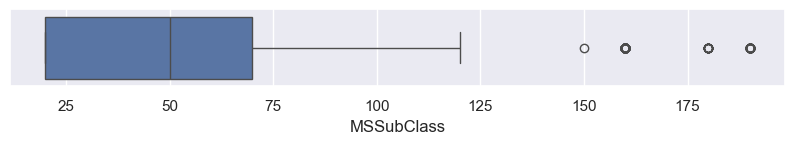

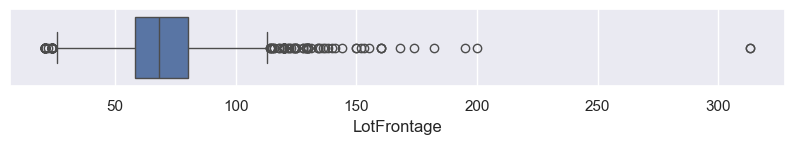

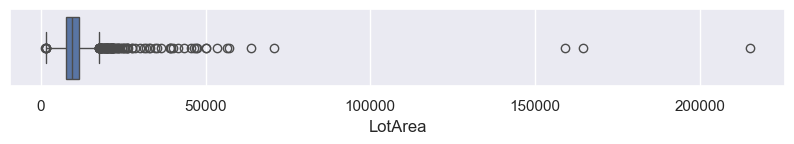

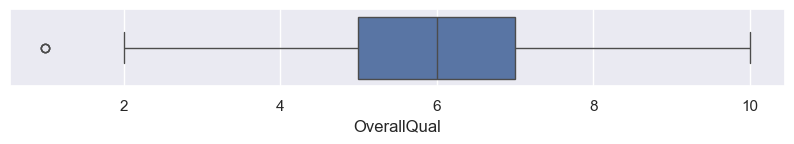

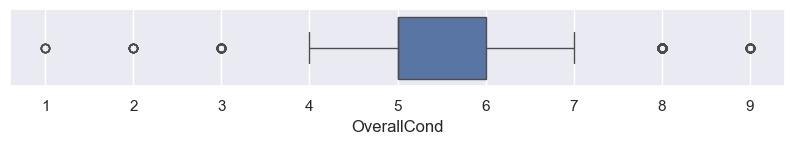

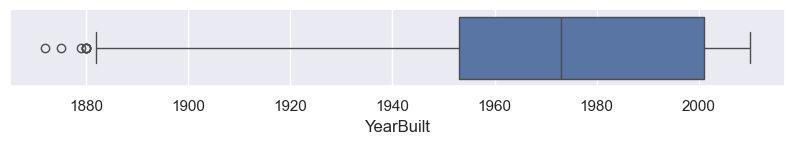

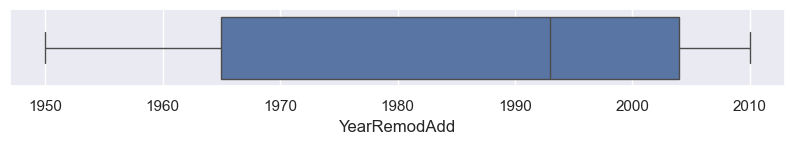

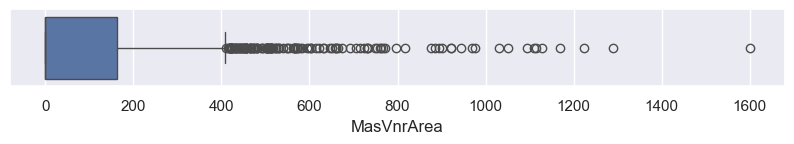

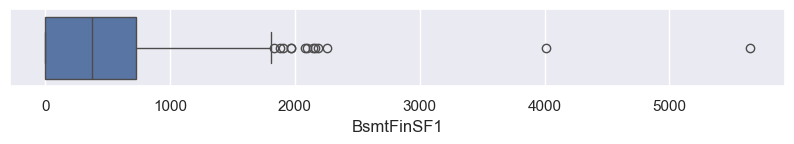

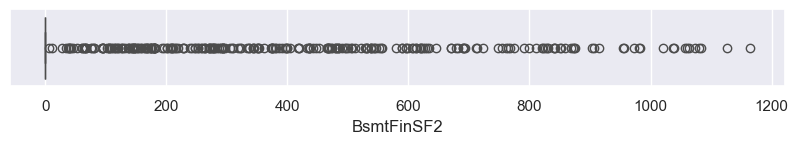

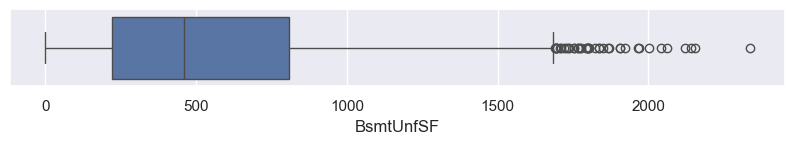

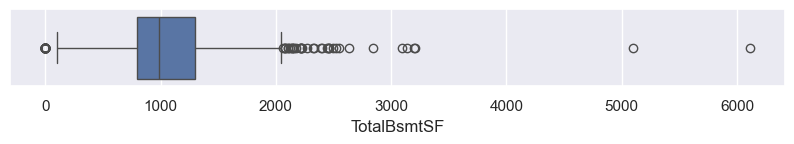

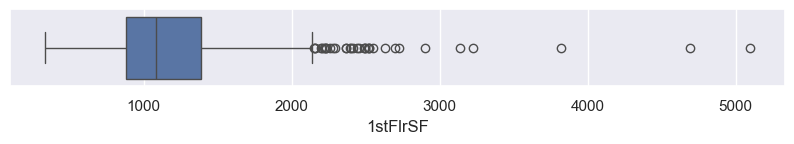

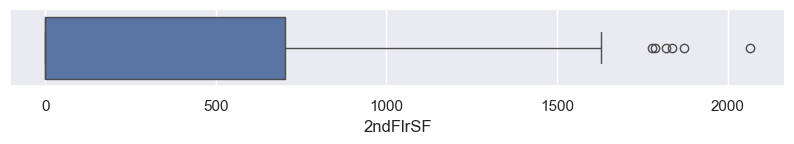

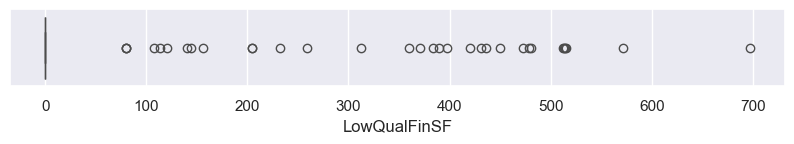

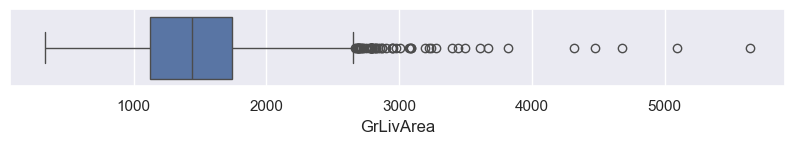

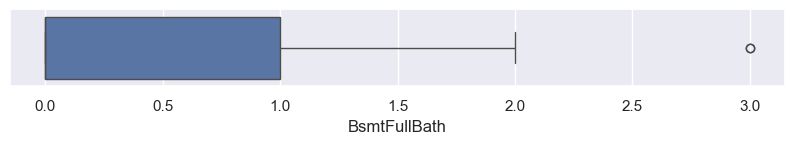

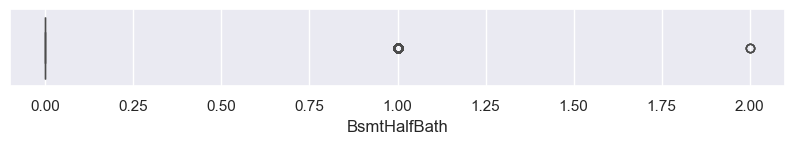

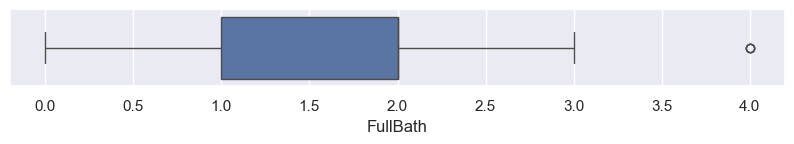

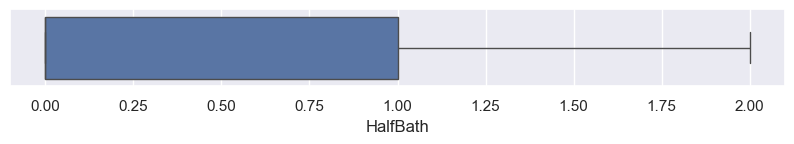

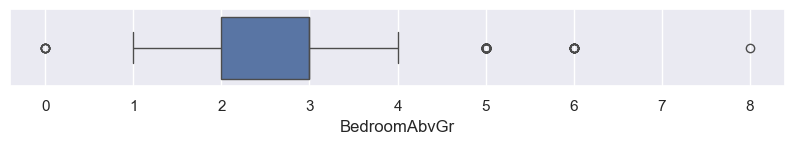

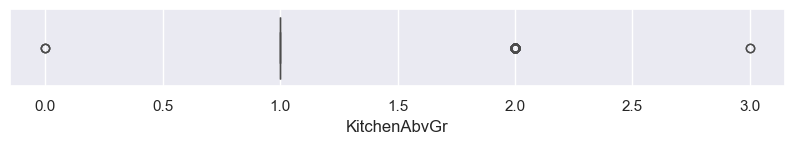

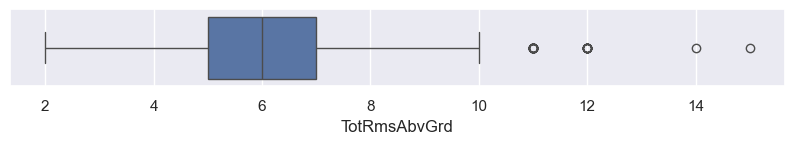

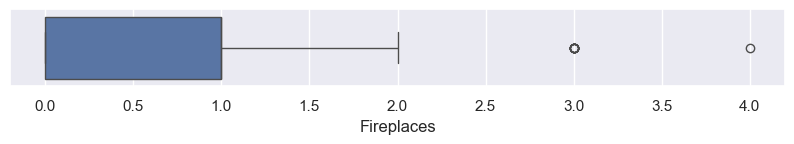

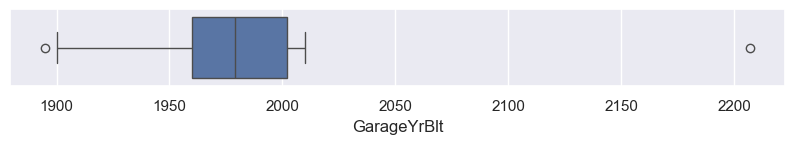

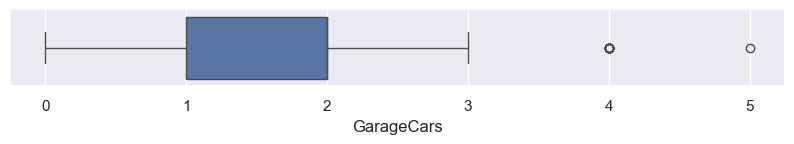

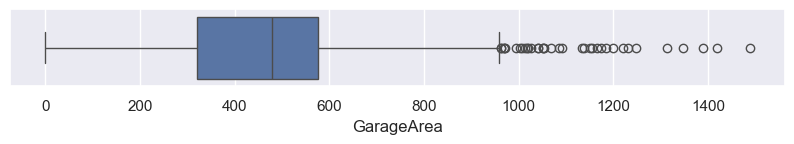

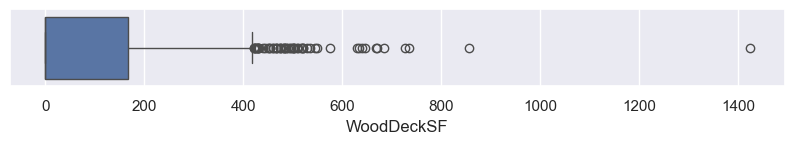

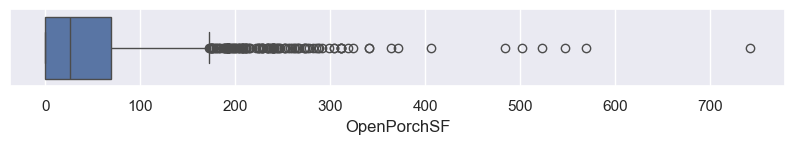

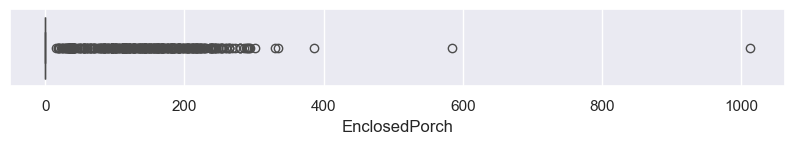

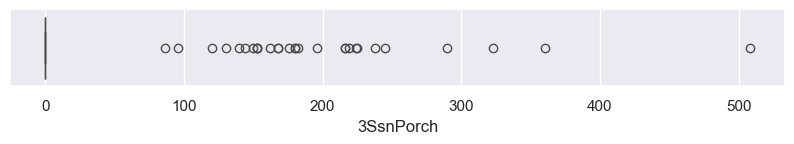

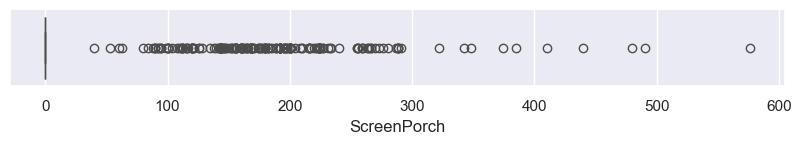

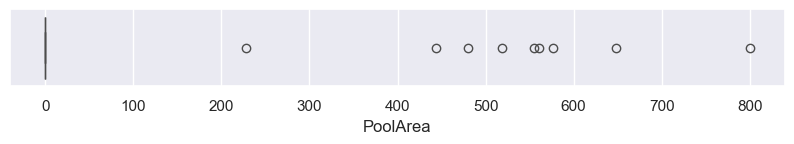

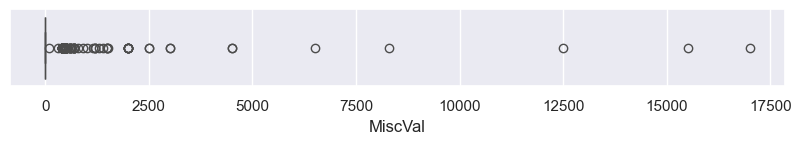

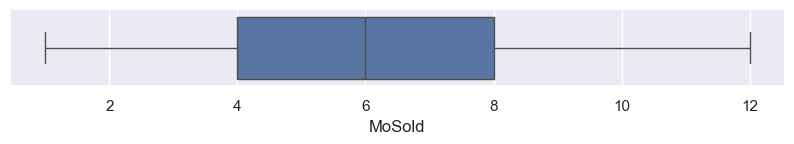

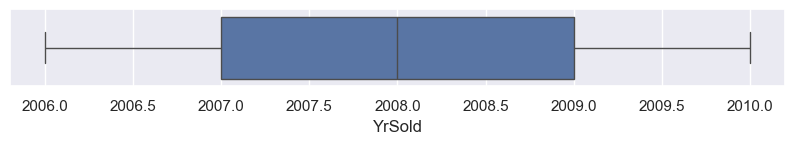

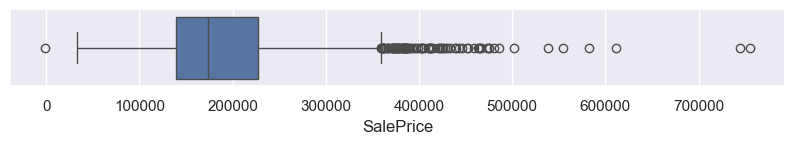

In [123]:
# 3. Realizar la correlacion de los dos datasets
# Between data and data_sin_y

# data dataset
# number are including all the columns with numeric data
data_cols = data_without_object.columns

# Here just I taked the data_without_object and not data_without_object because
# both are the same dataset but data_without_object is the dataset without principal variable

for column in data_cols:
  plt.figure(figsize=(10, 1))
  sns.boxplot(data=data[data_cols], x=column)

In [124]:
# Count the number of missing values (NaN) in each column of the dataframe
data_without_object.isna().sum()

MSSubClass         0
LotFrontage      387
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        20
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       1
BsmtHalfBath       1
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      126
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [125]:
# Llenar en el dataset que no tiene la variable objetivo en los datos null lo siguiente
  # Campos categoricos la mas frecuente (most_frequent)

# Get columns with object dtype
object_columns = data_sin_y.select_dtypes(include='object').columns

# Iterate through each object column and impute with most frequent value
for col in object_columns:
    if data_sin_y[col].isna().sum() > 0:
        impute = SimpleImputer(strategy='most_frequent')
        print(f'Initial value counts for {col}: \n', data_sin_y[col].value_counts())
        
        data_sin_y[col] = impute.fit_transform(data_sin_y[[col]]).ravel()
        
        print(f'\nNull values in {col}: ', data_sin_y[col].isna().sum())
        print(f'\nValue counts for {col} after imputation: \n', data_sin_y[col].value_counts())
        print('-' * 50)



Initial value counts for MSZoning: 
 MSZoning
RL         1808
RM          351
FV          101
RH           21
C (all)      17
Name: count, dtype: int64

Null values in MSZoning:  0

Value counts for MSZoning after imputation: 
 MSZoning
RL         1812
RM          351
FV          101
RH           21
C (all)      17
Name: count, dtype: int64
--------------------------------------------------
Initial value counts for Alley: 
 Alley
Grvl    90
Pave    58
Name: count, dtype: int64

Null values in Alley:  0

Value counts for Alley after imputation: 
 Alley
Grvl    2244
Pave      58
Name: count, dtype: int64
--------------------------------------------------
Initial value counts for Utilities: 
 Utilities
AllPub    2300
NoSeWa       1
Name: count, dtype: int64

Null values in Utilities:  0

Value counts for Utilities after imputation: 
 Utilities
AllPub    2301
NoSeWa       1
Name: count, dtype: int64
--------------------------------------------------
Initial value counts for Exterior1st: 
 

In [126]:
# Count the number of missing values (NaN) in each column of the dataframe
data.select_dtypes(include=[np.number]).isna().sum()

MSSubClass         0
LotFrontage      387
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        20
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       1
BsmtHalfBath       1
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      126
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [127]:
# Llenar en el dataset que no tiene la variable objetivo en los datos null lo siguiente
#     Campos numerico la mediana (median)
impute = SimpleImputer(strategy='median')

for col in data_sin_y_without_object.columns:
    print(f'Initial median for {col}: ', data_sin_y_without_object[col].median())
    
    output = impute.fit_transform(data_sin_y_without_object[[col]])
    output = pd.DataFrame(output, columns=[col])
    
    data_sin_y[col] = output[col]
    
    print(f'\nNull into new dataframe for {col}: ', output.isna().sum())
    print(f'\nMedian for new dataframe for {col}: ', output.median())
    print('\n' + '-'*50 + '\n')

Initial median for MSSubClass:  50.0

Null into new dataframe for MSSubClass:  MSSubClass    0
dtype: int64

Median for new dataframe for MSSubClass:  MSSubClass    50.0
dtype: float64

--------------------------------------------------

Initial median for LotFrontage:  68.0

Null into new dataframe for LotFrontage:  LotFrontage    0
dtype: int64

Median for new dataframe for LotFrontage:  LotFrontage    68.0
dtype: float64

--------------------------------------------------

Initial median for LotArea:  9452.5

Null into new dataframe for LotArea:  LotArea    0
dtype: int64

Median for new dataframe for LotArea:  LotArea    9452.5
dtype: float64

--------------------------------------------------

Initial median for OverallQual:  6.0

Null into new dataframe for OverallQual:  OverallQual    0
dtype: int64

Median for new dataframe for OverallQual:  OverallQual    6.0
dtype: float64

--------------------------------------------------

Initial median for OverallCond:  5.0

Null into new

In [128]:
# Count the number of missing values (NaN) in each column of the dataframe
data_sin_y.select_dtypes(include=[np.number]).isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [ ]:
data_sin_y.info()

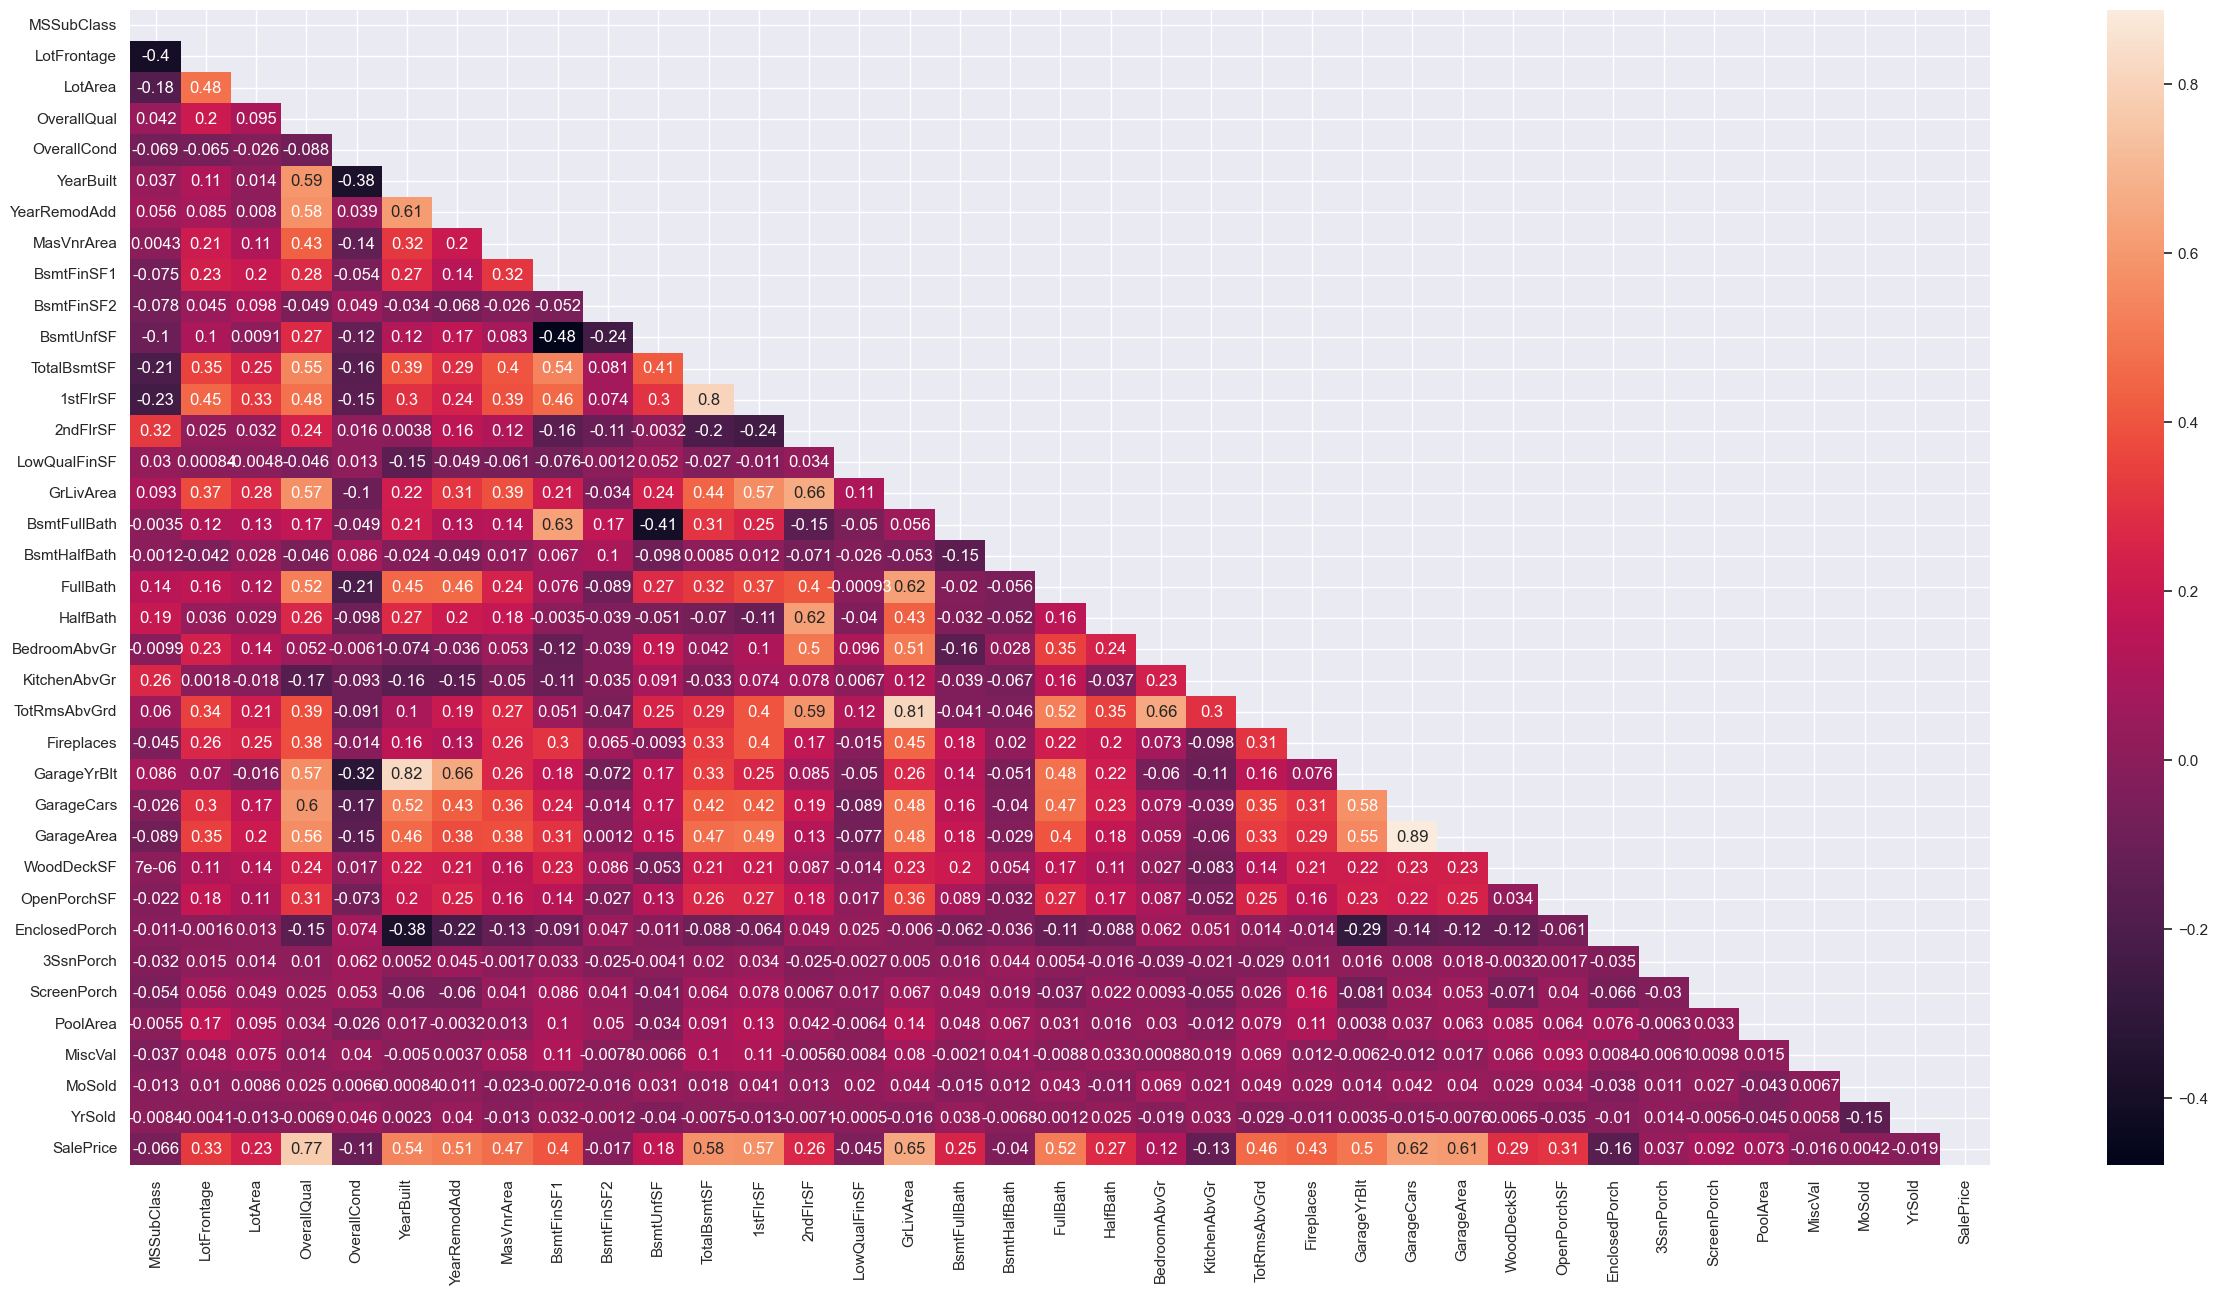

In [129]:
# Mostrar la matriz de correlacion de los dos datase data with objective variable
sns.set_theme(rc={"figure.figsize": (30, 15)})
mask = np.triu(np.ones_like(data[data_without_object.columns].corr(), dtype=bool))
sns.heatmap(data[data_without_object.columns].corr(), mask=mask, annot=True)
plt.show()

# Correlacion mayor al 90% en el dataset completo es con OverallCond

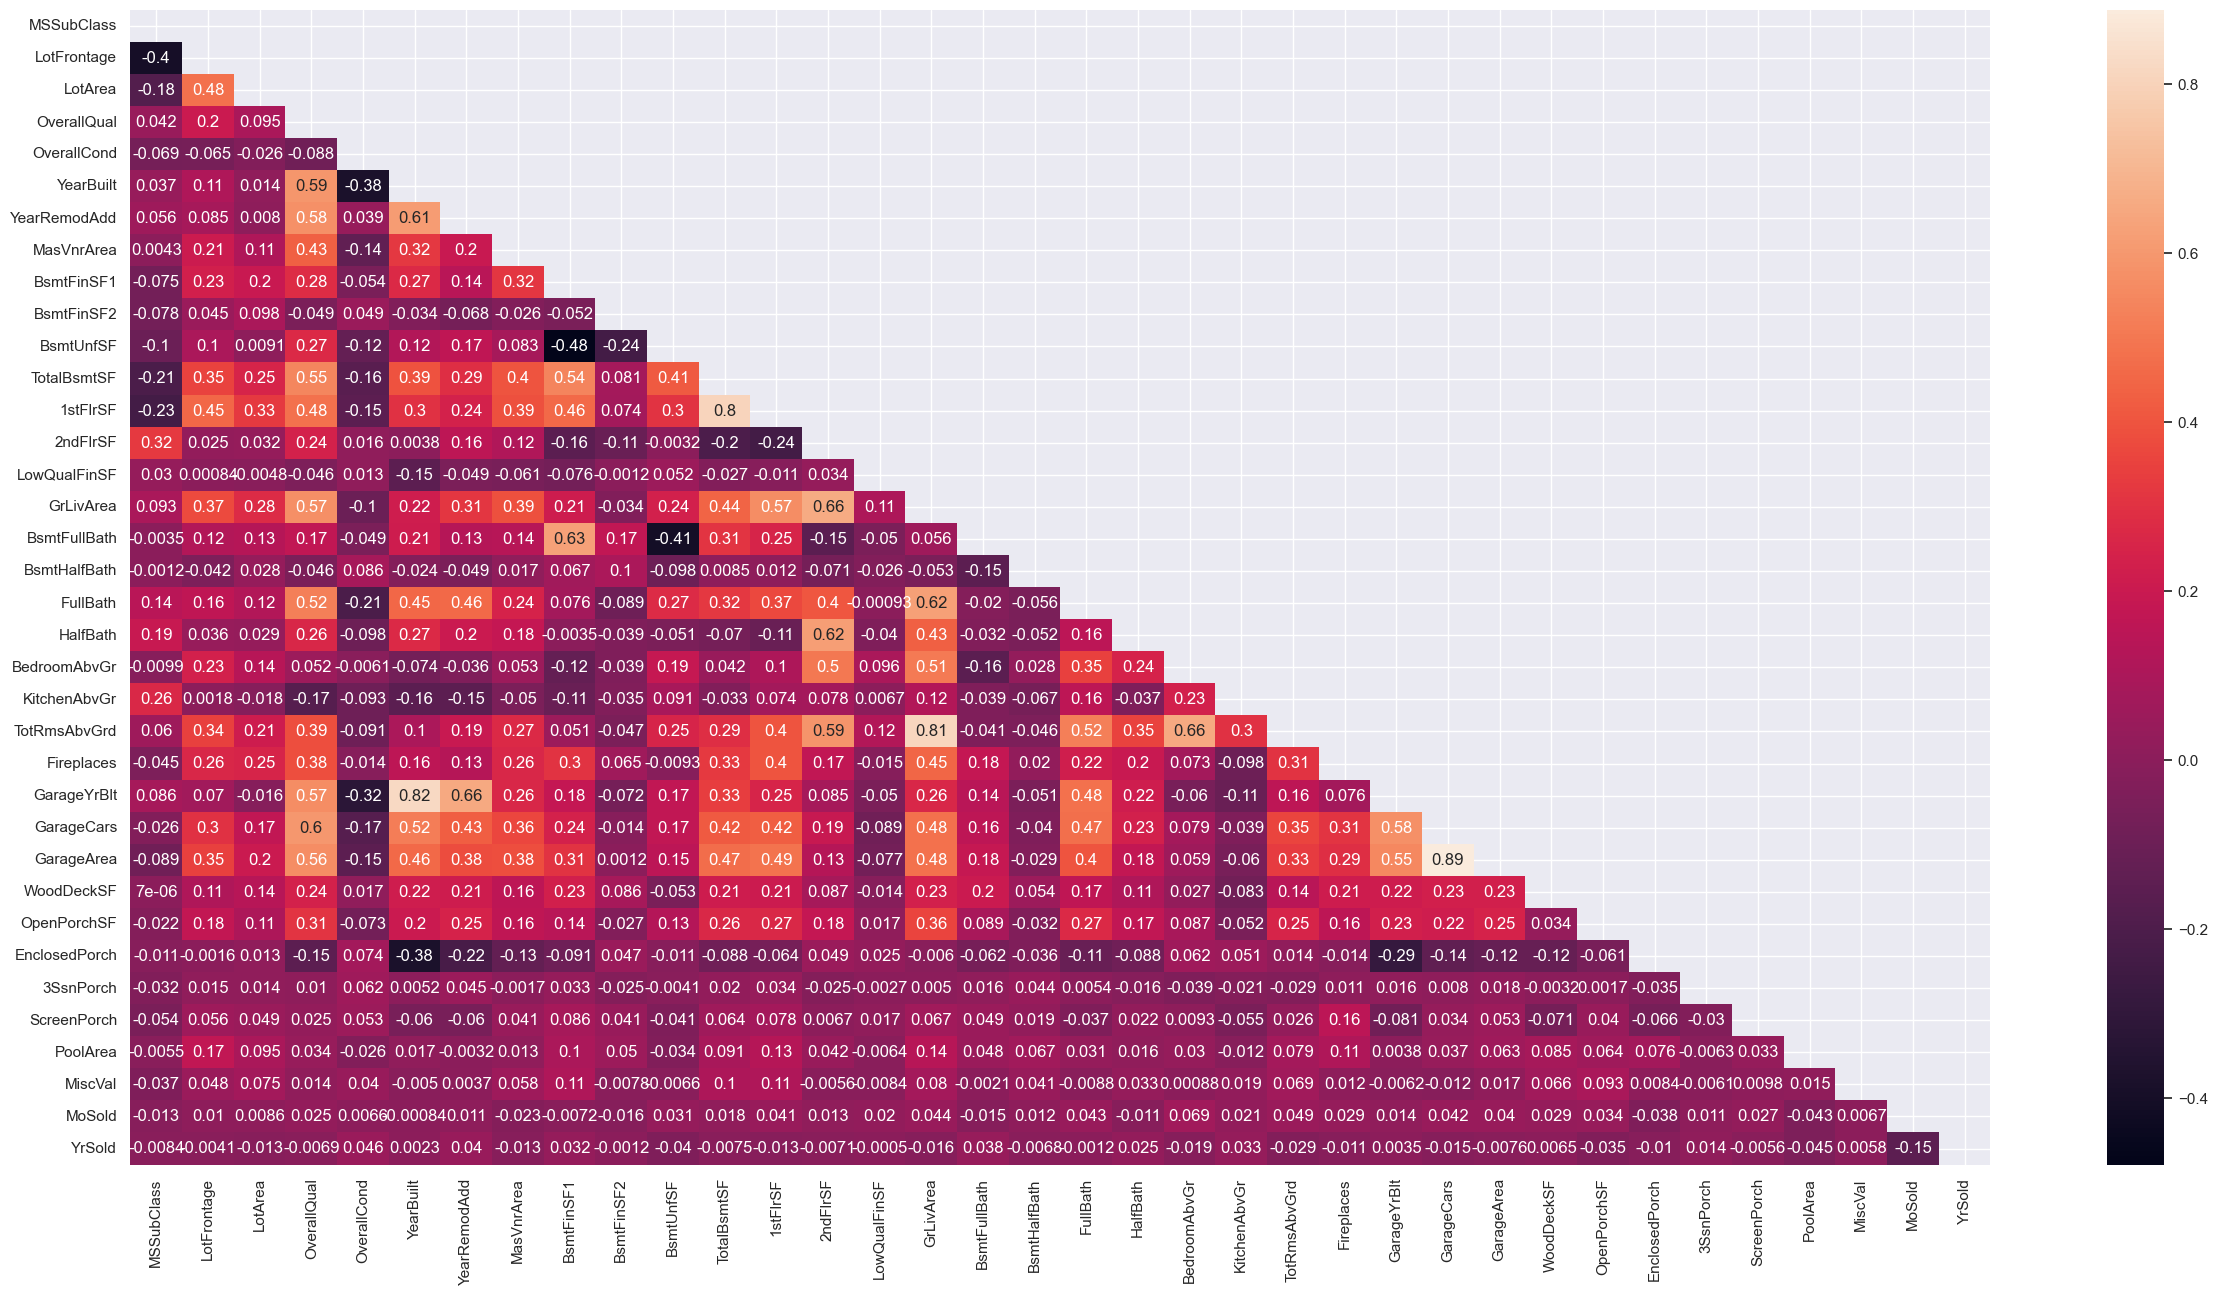

In [131]:
# Mostrar la matriz de correlacion de los dos datase wihout variable objective
sns.set_theme(rc={"figure.figsize": (30, 15)})
mask = np.triu(np.ones_like(data[data_sin_y_without_object.columns].corr(), dtype=bool))
sns.heatmap(data[data_sin_y_without_object.columns].corr(), mask=mask, annot=True)
plt.show()    

In [132]:
data_sin_y.to_csv('../data/data_sin_y.csv', index=False)
